In [9]:
%matplotlib inline
import math
import numpy as np
from matplotlib import pyplot as plt

# Homework

## Problem 1

Give me the solution to $x = e^{-x}$ that is $10^{-6}$ using bisection method.

Pick the initial bound from the following and explain why you can't pick the other one.
Bound A: (-1,0), Bound B (0,1)

#### Answer:

We pick Bound B, because $e^{-x}$ can never be negative, so it doesn't make sense to check $x = e^{-x}$ for the negative values in [-1,0]

In [3]:
l_bound= 0 #the left bound 
r_bound= 1 #the right bound
accuracy = 10**-6; #the accuracy we want


def g(x):
    return np.exp(-x)-x

def bisection(f,l_bound,r_bound,accuracy):
    error = (r_bound - l_bound) /2
    while 1:
        middle= l_bound + (r_bound - l_bound) /2
        #f_middle= f(middle)
        if(f(l_bound)*f(r_bound)>0):
            #print("no root here!")
            return False
        elif (f(middle)*f(l_bound)>0):
            l_bound=middle    
        elif(f(middle)*f(r_bound)>0):
            r_bound=middle
            
        if(error < accuracy): #python version of do while loop
            break; #we have to check condition before changing error, because in next line it will be the error of the next step!
        error= error/2 #if we check in while head, that will give us too little accuracy!
    return middle
        
root= bisection(g,l_bound,r_bound,accuracy)
print("Answer for x is approx. : ", root)        
print("Function value at this point is:" , g(root))
#print(np.abs(g(root))<accuracy) #just for testing

NameError: name 'np' is not defined

## Problem 2
Find all value of $x \in [0,1]$ such that $f(x)=0$ for

$f(x) = -0.000216747 + 0.0072868 x - 0.0977383 x^2 + 0.664685 x^3 - 
 2.40773 x^4 + 4.46766 x^5 - 3.7091 x^6 + x^7$
 
Make sure your answers are at most $10^{-6}$ away from the real solution.

In [11]:
def f(x):
    return -0.000216747 + 0.0072868*x - 0.0977383*x**2 + 0.664685*x**3 - 2.40773*x**4 + 4.46766*x**5 - 3.7091*x**6 + x**7

roots=[]#bisection(f,0,1,1e-6)

for i in range(100):
    res= bisection(f,i/100,((i+1)/100),1e-6)
    if(res):
        roots.append(res)
print (roots)


[0.1221661376953125, 0.2200286865234375, 0.3332989501953124, 0.7854095458984375]


2.1) Find all the local minima and maxima of the above function. How do you figure out whether it is a local maximum or local minimum

#### Answer:

You can find the extrem points by finding the roots of f prime and their type by the value of f double prime at this point

Local Maximum in 0.19140808105468748 with Value 1.3690740025168456e-06
Local Minimum in  0.29706604003906245 with Value -1.2147132582967151e-05
Local Maximum in 0.6817852783203125 with Value 0.0038258083169440266


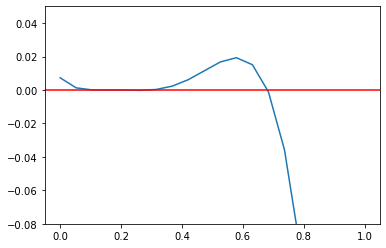

In [12]:
def f_prime(x):
    return 0.0072868 - 0.195477 *x + 1.99406* x**2 - 9.63092 *x**3 + 22.3383 *x**4 - 22.2546 *x**5 + 7 *x**6

def f_doublePrime(x):
    return -0.195477 + 3.98812 *x - 28.8928 *x**2 + 89.3532 *x**3 - 111.273 *x**4 + 42 *x**5



xs=np.linspace(0,1,20)
plt.plot(xs,f_prime(xs))
plt.axhline(0,color='red') #where f_prime=0, f has a possible extreme point
plt.ylim(-0.08,0.05)
extremePoints=[]
for i in range(100):
    res= bisection(f_prime,i/100,((i+1)/100),1e-6)
    if(res):
        extremePoints.append(res)
#print(extremePoints)
for point in extremePoints:
    print("Local Minimum in " if (f_doublePrime(point)>0) else "Local Maximum in", point , "with Value", f(point))

2.2) What is the `global maximum` and `global minimum` of the function above within the range $x\in[0,1]$

In [13]:
candidates=extremePoints.copy()
candidates.extend([0,1]) #but in boundary points, those are potential max or mins as well
candidateValues=[f(point) for point in candidates]
print(candidateValues)

print("Global Maximum is", max(candidateValues))
print("Global Minimum is", min(candidateValues))


[1.3690740025168456e-06, -1.2147132582967151e-05, 0.0038258083169440266, -0.000216747, -0.07515324699999937]
Global Maximum is 0.0038258083169440266
Global Minimum is -0.07515324699999937


## Problem 3
In quantum physics, when finding a bound state for a finite potential well one would end up with the following equation(Yes E is negative):

$$
\sqrt{\frac{-E}{E+V_0}} = \tan \sqrt{2m \frac{E+V_0}{\hbar^2} a}
$$

The goal is to find all Energy($E$) that satisfy this equation.
For simplicity, let
- $V_0 = 1$
- $m = 1$
- $a = 1$
- $\hbar = 1$(Yes this is called natural unit)

$$
    \sqrt{\frac{-E}{E+1}} = \tan \sqrt{2(E+1)}
$$

Find the value for $E\in (-1.0, 0)$ which satisfy the equation above). Make sure you accuracy is $<\pm10^{-4}$


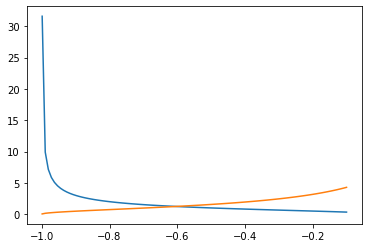

In [14]:
def f(x):
    return math.sqrt(-x/(x+1))
def g(x):
    return math.tan(math.sqrt(2*(x + 1)))

xs = np.linspace(-0.999,-0.1, 100)
fx = [f(x) for x in xs]
gx = [g(x) for x in xs]
plt.plot(xs,fx)
plt.plot(xs,gx)

## Problem 4
Ply quit programming and decide to be a Apple(fruit) shop owner. He bought 1000 apples everyday and try to sell it. The probability $k$ customer want Ply's apple(one each) is given by Poisson distribution:

$$
    P(k; \lambda) = \frac{\lambda^k \exp(-\lambda)}{k!}
$$

Where $\lambda$ is an parameter that represent the mean of number of people that want Ply's apple each day.

After selling apples for 2000 days Ply found that his 1000 apples a day are sold out 600 days out of 2000 days.

The goal for this problem is to figure out how he should change the number of apples he bought in a day.

- In case you are curious https://en.wikipedia.org/wiki/Poisson_distribution. The true distribution of this selling apple process should be binomial distribution but with large enough customer and low enough probability of an individual buying an apple this is an excellent approximatoin.

4.1) You may find that if you try to code poisson distribution directly. It will not work with large number.
$$
    P(k; \lambda) = \frac{\lambda^k \exp(-\lambda)}{k!}
$$

Explain briefly why python complains

#### Answer:
The factorial of 1000 is a huge number, which overflows the length a float can hold. Therefore Python can't convert the number to that format. biggest number that a float can hold is 1.7976931348623157e+308, which is less then even 171! .

In [15]:
import math
def bad_poisson(lmd, k):
    return pow(lmd,k)*math.exp(-lmd)/math.factorial(k)
#bad_poisson(1000,1000) # uncomment to see it breaks


4.2) A very useful trick to avoid this problem is to take log and exponentiate. That is

$$
    P(k; \lambda) = \exp\left( \ln \left[ \frac{\lambda^k \exp(-\lambda)}{k!} \right] \right)
$$

First, show that
$$
    \ln(P(k; \lambda)) = (\ldots \ln(\ldots)-\ldots)-\ln(k!)
$$



### Proof:
Using the logarithm rules we get:
$$
\ln(P(k; \lambda)) = \ln(\frac{\lambda^k \exp(-\lambda)}{k!}) = \frac{\ln(\lambda^k \exp(-\lambda))}{\ln(k!)}
    = \frac{\ln(\lambda^k) + \ln(\exp(-\lambda))}{\ln(k!)} = (k*\ln(\lambda) - \lambda) - ln(k!)
$$
q.e.d.

### Proof:
Using the logarithm rules we get:
$$
\ln(P(k; \lambda)) = \ln(\frac{\lambda^k \exp(-\lambda)}{k!}) = \ln(\lambda^k \exp(-\lambda)) - \ln(k!)
    = \ln(\lambda^k) + \ln(\exp(-\lambda)) - \ln(k!) = k*\ln(\lambda) - \lambda - ln(k!)
$$
q.e.d.

4.3) $\ln(k!)$ shows up everywhere in math. So most math library have `lgamma` function to compute this very fast.
For example,

`math.lgamma(5) == math.log(math.factorial(4))`

Your job for this problem is to implement $P(k; \lambda)$ using log-exp trick.

If you do it right, $P(k=1000; \lambda=1000) \approx 0.0126146$

In [16]:
def good_poisson(lmd, k):
    return math.exp((k*math.log(lmd)-lmd)-math.lgamma(k+1))
good_poisson(1000,1000)

0.012614611348719664

4.4) Now here is the fun part. Suppose that $\lambda = 987.6$(this is not true). Find the probability that Ply will sell all his 1000 apples. (Remember if 2000 people want Ply's apple, he his apple will also be sold out). 

And No, summing up to infinity is not practical.

### Answer

We get the propability for P('1000 or more apples') by subtracting P("999 or fewer apples") from the 100%.
Since summing up all the numbers to infinity is not practical, we can just arrive at the propability for P("1000 or more apples") by subtracting P("999 or fewer apples") from the 100% which all Probabilitys need to add up to. This is still a lot of individual probabilitys but also way less then infinity (as most things tend to be)

In [17]:
def poisson_percentage(lmd):
    totalPercent= 0
    for i in range (999):
        totalPercent += good_poisson(lmd,i) #chance Ply sells less then 1000 apples
    return 1-totalPercent
print("The chance that Ply sells all his apples is : ", poisson_percentage(987.6)*100 , '%')      

The chance that Ply sells all his apples is :  36.260488004681335 %


4.5) Recall the information that

After selling apples for 2000 days Ply found that his 1000 apples a day are sold out 600 days out of 2000 days.

Find the value for $\lambda$ to a decent accuracy($<\pm 0.1$)

The actual lambda is  982.12890625


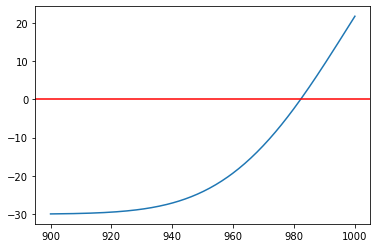

In [18]:
xs=np.linspace(900,1000,200)
def find_lambda(lmd):
    totalPercent= 0
    for i in range (0,999):
        totalPercent += good_poisson(lmd,i) #chance Ply sells less then 1000 apples
    
    return ((1-totalPercent)-0.3)*100

#print(xs)
arr = [find_lambda(i) for i in xs]
#for i in xs:
 #   bisection((poisson_percentage(i)-0.3),800,1200,0.1)
plt.plot(xs,arr)
plt.axhline(color='red')
lamb = bisection(find_lambda,800,1200,0.1)
print("The actual lambda is " , lamb)

4.6) Using $\lambda$ you found in 4.5).

Ply bounght apple for 20 Baht each and he sell it for 50 Baht each. Which means that for each apple he sells he make a profit of 30 baht. But, at the end of each day Ply has to trash all unsold Apples(taking a loss of 20 Baht each).

If Ply bought 1000 apples a day, what would be his expected profit(remember expected value from discrete math/stat/quantum?).



### Answer

Expected Profit= Chance of event * total value of the event

In [19]:
#expectedSales=poisson_percentage(lamb)
#expectedProfit= *30 - (1-expectedSales)*20 #lamb= lambda from previous exercise
def expectedProfit(lmd):
    profit=0
    for i in range(1000):
        #saleChance=good_poisson(lmd,i)
        profit += good_poisson(lmd,i)*(i*30 - (1000-i)*20) #chance of occuring*value of the event, add all of them up
    return profit
print("Ply can expect a Profit of ", expectedProfit(lamb), "baht")

Ply can expect a Profit of  20174.683786667956 baht


4.7) Using $\lambda$ you found in 4.5) Find the number of apple Ply should buy in a day to maximize his expected profit.

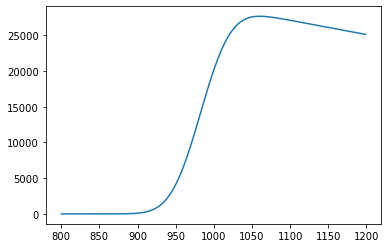

In [24]:
def profitFunc(num_apples,lmd):
    profit=0
    for i in range(num_apples):
        #saleChance=good_poisson(lmd,i)
        profit += good_poisson(lmd,i)*(i*30 - (num_apples-i)*20) #chance of occuring*value of the event, add all of them up
    return profit

arr=[profitFunc(i,lamb) for i in range(800,1200)]
xs=[i for i in range(800,1200)]
plt.plot(xs,arr)

## Problem 5

Full Width at Half Maximum(FWHM). Distribution width is a very important quantity. It tells you how wide a the distribution is. One way to do that is to use a quantity called full-width half max.

This is the width of the distribution at half maximum. 

For example for distribution shown below the maximum is at x=0.0 and y=1.0

The maximum of this distribution is 1.0. So we are interested in the width of the distribution when the value of the distribution is 1.0/2=0.5

The width of the distribution is shown in black line. In this case it's about 2.35

Text(0, 0.3, 'FWHM')

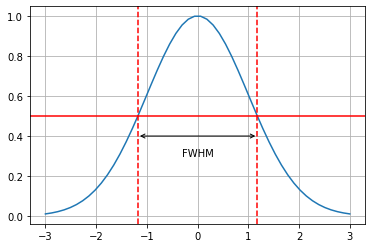

In [21]:
import math
def demo(x):
    return math.exp(-x**2/2.0)
x = np.linspace(-3,3)
y = [demo(xx) for xx in x]
plt.plot(x,y)
plt.axhline(0.5, color='red')

plt.axvline(2.355/2,color='red',linestyle='dashed')
plt.axvline(-2.355/2,color='red',linestyle='dashed')

plt.grid()
plt.annotate(
    '', xy=(-2.355/2, 0.4), xycoords='data',
    xytext=(2.355/2, 0.4), textcoords='data',
    arrowprops={'arrowstyle': '<->'})
plt.text(0,0.3,'FWHM',horizontalalignment ='center')

5.1)Find FWHM of the following function. Make sure the bound on error of the FWHM is less than $10^{-4}$.

Maximum:  2.3450469970703125  with value  0.3225806450871497
FWHM has the width  6.20006158715114  with value  0.16129032254357484


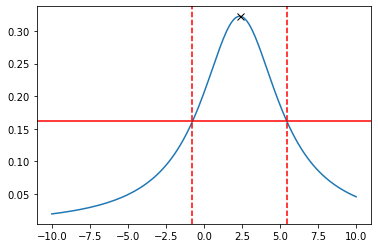

In [26]:
import math

def f(x, gamma=3.1):
    mu = 2.345
    return gamma/((x-mu)**2+gamma**2)

def d(x, gamma=3.1):
    mu = 2.345
    return -(2*gamma*(-mu + x))/(gamma**2+(mu-x)**2)**2

def halfmax(x):
    return f(x)-(0.5*maxvalue);
  

x = np.linspace(-10,10,200)
y = [f(xx) for xx in x]
plt.plot(x,y)

l = -10.0
r = 10.0
accuracy= 1e-4

maximum = bisection(d, l, r,accuracy)
maxvalue = f(maximum)
hmValue = maxvalue/2

leftfwhm = bisection(halfmax, l, maximum,accuracy)
rightfwhm = bisection(halfmax, maximum, r,accuracy)
fwhm = rightfwhm - leftfwhm
     
print ("Maximum: ", maximum, " with value ", maxvalue) #only maximum (-> plot)
print ("FWHM has the width ", fwhm, " with value ", hmValue)

plt.plot(maximum, maxvalue, marker='x', markersize=7, color="black")
plt.axhline(hmValue, color="red")
plt.axvline(leftfwhm, color="red", linestyle="dashed")
plt.axvline(rightfwhm, color="red", linestyle="dashed")


5.2) Plot FWHM(y-axis) as a function of $\gamma$(gamma) from $\gamma=0.5\ldots 3$. Make sure you have at least 30 points.

In [23]:
print(f(1.0, gamma=0.2)) # you may find this useful
gamma= np.linspace(0.5,3,50)

leftfwhm = bisection(halfmax, l, maximum,accuracy)
rightfwhm = bisection(halfmax, maximum, r,accuracy)
fwhm = rightfwhm - leftfwhm

0.1081651140465921


5.3) (Optional) Prove the relation you found in 5.2)